In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import datetime as dt
import os

In [2]:
df =pd.read_csv("supermarket_sales - Sheet1.csv")
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
#Changing date column datatype from object to datetime
df["Date"].dtype

dtype('O')

In [5]:
df["Date"] = pd.to_datetime(df["Date"])
df["Date"].dtypes

dtype('<M8[ns]')

In [6]:
#adding year,month  and day columns in the dataset

df["Month"] = df["Date"].dt.month_name()
df["Day"] = df["Date"].dt.day_name()
df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Day
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,January,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,March,Friday
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,March,Sunday
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,January,Sunday
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,February,Friday


We have added the year,month and day column to allow more analysis basedon this time frames

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,2.649463e+01,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431e+00,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,2.458853e+02,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,2.341765e+02,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,6.131498e-14,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580e+00,4.000000,5.500000,7.000000,8.500000,10.000000


In [8]:
df["Invoice ID"].duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [10]:
corr = df.corr()
corr

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


# Exploratory Data Analysis and Visualization

# BRANCH

### detailed Analysis of purchasee in Branch per City

In [11]:
Branch = df.groupby(["Branch","City"])["Branch"].count().reset_index(name="count")
Branch

,Branch,City,count
0,A,Yangon,340
1,B,Mandalay,332
2,C,Naypyitaw,328


Text(0.5, 1.0, 'Purchases per Branch and their cities')

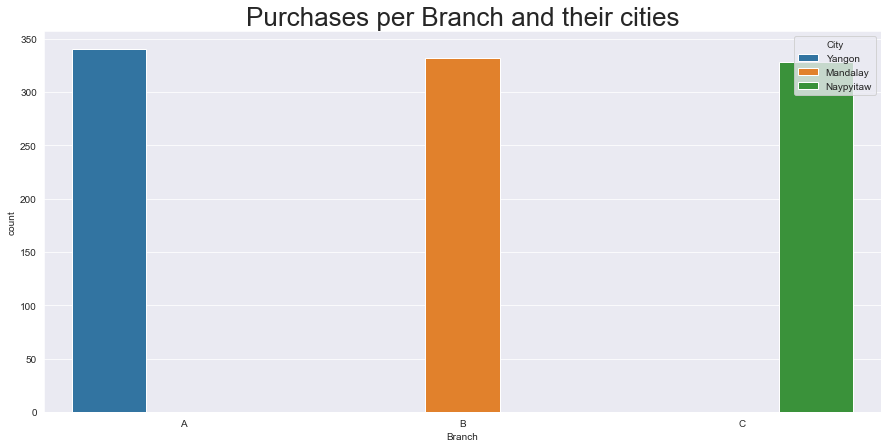

In [12]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,7))
sns.barplot(x = Branch["Branch"],y= Branch["count"],hue=Branch["City"])
plt.title("Purchases per Branch and their cities",fontsize=26)

Branch A located in Yangon had the most purchases at 340, followed by Branch B at Mandalay with 332 purchases then Branch C at Naypyitaw with 328 purchases

### detailed Analysis of Customer type per Branch

In [13]:
Branch_customer_type = df.groupby(["Branch","Customer type"])["Branch"].count().reset_index(name="count")
Branch_customer_type

,Branch,Customer type,count
0,A,Member,167
1,A,Normal,173
2,B,Member,165
3,B,Normal,167
4,C,Member,169
5,C,Normal,159


Text(0.5, 1.0, 'Leading Customer Type per Branch')

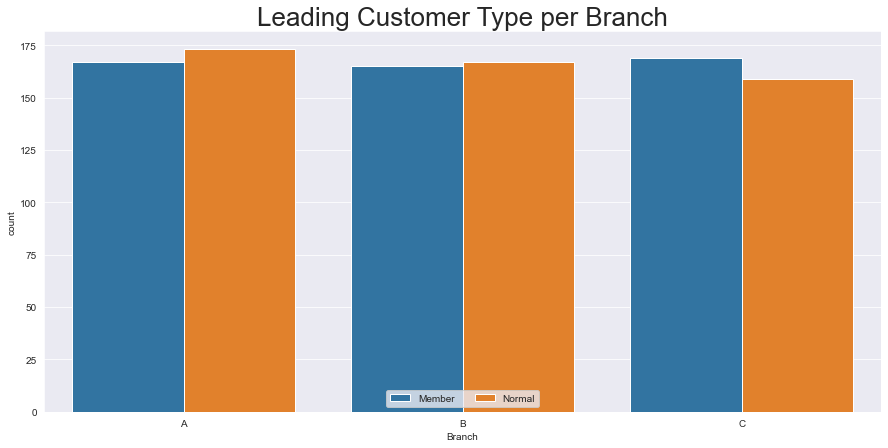

In [14]:
plt.figure(figsize=(15,7))
sns.barplot(x= Branch_customer_type["Branch"],y=Branch_customer_type["count"],hue=Branch_customer_type["Customer type"])
plt.legend(ncol=10, loc="lower center")
plt.title("Leading Customer Type per Branch",fontsize=26)

in both Branch A and Branch B the leading Customer type was Normal  customers then Memberscustomers; but in Branch  C, Members customer type exceeded the Normalcustomers by two.

### detailed analysis of Gender per Branch

In [15]:
Branch_Gender = df.groupby(["Branch","Gender"])["Branch"].count().reset_index(name="count")
Branch_Gender

,Branch,Gender,count
0,A,Female,161
1,A,Male,179
2,B,Female,162
3,B,Male,170
4,C,Female,178
5,C,Male,150


Text(0.5, 1.0, 'Common Gender per Branch')

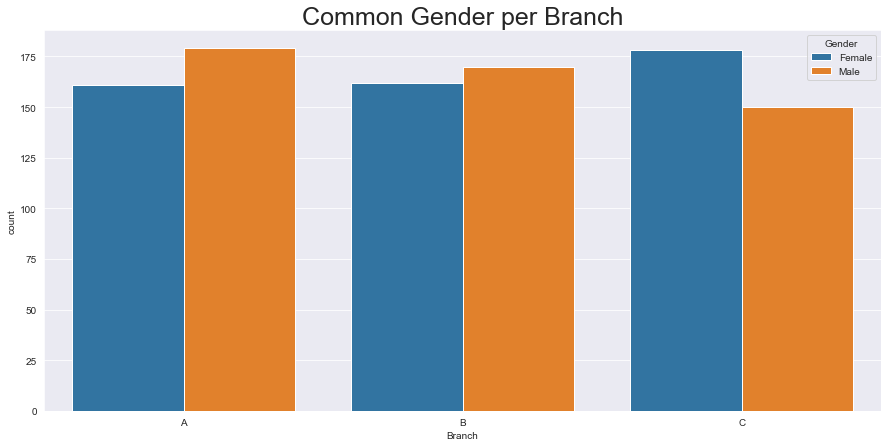

In [16]:
plt.figure(figsize=(15,7))
sns.barplot(x=Branch_Gender["Branch"],y=Branch_Gender["count"],hue=Branch_Gender["Gender"])
plt.title("Common Gender per Branch",fontsize=25)

Branch A was mostly visited by Male customers than females.Branch B was mostly visited by Male customers than females although there was a small difference. Branch C was highly visited by female customersthan male customer

# CUSTOMER TYPE

In [17]:
df["Customer type"].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

Members customertype  were more than the normal customers in all Branches combined

In [18]:
Customertypes_Gender = df.groupby(["Customer type", "Gender"])["Customer type"].count().reset_index(name="count")
Customertypes_Gender = Customertypes_Gender.sort_values("count",ascending=False)
Customertypes_Gender

,Customer type,Gender,count
0,Member,Female,261
3,Normal,Male,259
1,Member,Male,240
2,Normal,Female,240


Text(0.5, 1.0, 'Customer type per Gender')

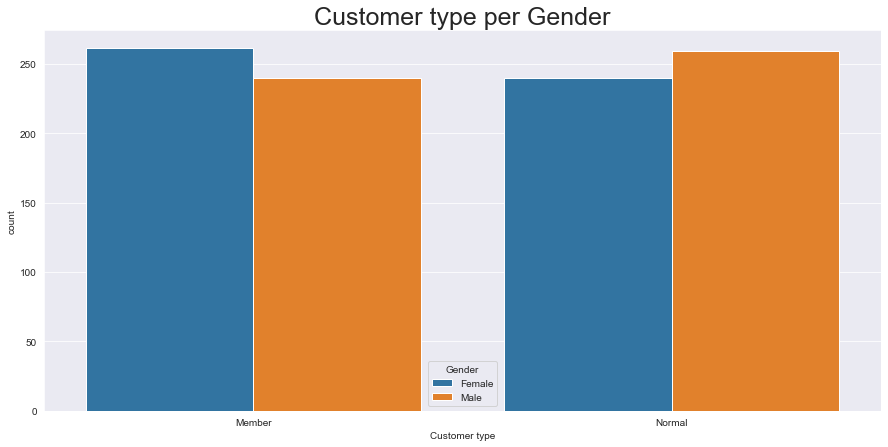

In [19]:
plt.figure(figsize=(15,7))
sns.barplot(x=Customertypes_Gender["Customer type"],y=Customertypes_Gender["count"],hue=Customertypes_Gender["Gender"])
plt.title("Customer type per Gender",fontsize=25)


In the Member customer type segment,Female member customers were more than the male member customers while in the normal customer segment male cutomersweremore than the female members

## PRODUCT LINE

### detailed analysis of product lines per branch

In [20]:
line_Branch = df.groupby(["Product line","Branch"])["Branch"].count().reset_index(name="count")
line_Branch = line_Branch.sort_values("count",ascending=False)
line_Branch

,Product line,Branch,count
8,Food and beverages,C,66
5,Fashion accessories,C,65
12,Home and lifestyle,A,65
4,Fashion accessories,B,62
16,Sports and travel,B,62
0,Electronic accessories,A,60
15,Sports and travel,A,59
6,Food and beverages,A,58
2,Electronic accessories,C,55
1,Electronic accessories,B,55


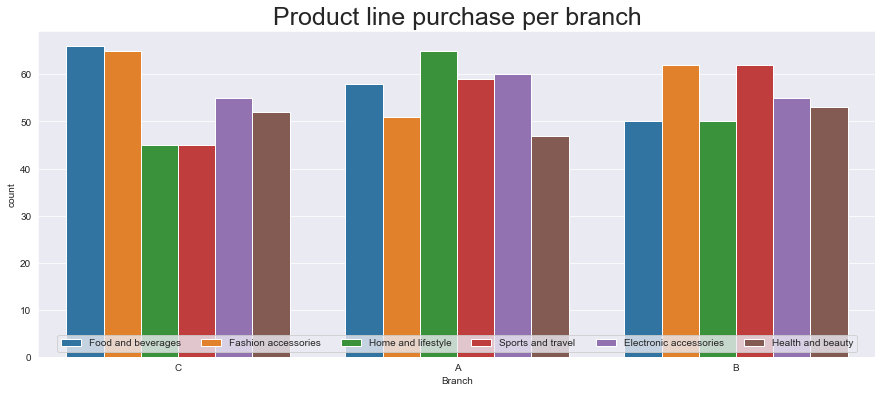

In [21]:
plt.figure(figsize=(15,6))
sns.barplot(x=line_Branch["Branch"],y=line_Branch["count"],hue=line_Branch["Product line"])
plt.title("Product line purchase per branch",fontsize=25)
plt.legend(ncol=10, loc="lower center")


In Branch A,the most purchased product line was Home and Lifestyle,followed by Electronics ,then Sports and Travel. In Branch B both Fashion and Sports and travel were the most purchased product line followed by Electronics . In Branch C, Food and beverages was the most purchased product line ,followed by Fashion accessories then Electronics.Electronics and accessories came third as the most purchased product line in all Branches

### detailed analysis of Product line per  customer type, gender,totals

In [22]:
line_Customer_Gender = df.groupby(["Product line","Customer type","Gender"])["Gender"].count().reset_index(name="count")
line_Customer_Gender = line_Customer_Gender.sort_values("count")
line_Customer_Gender

,Product line,Customer type,Gender,count
12,Health and beauty,Member,Female,30
18,Home and lifestyle,Normal,Female,32
14,Health and beauty,Normal,Female,34
0,Electronic accessories,Member,Female,35
21,Sports and travel,Member,Male,36
17,Home and lifestyle,Member,Male,36
22,Sports and travel,Normal,Female,37
5,Fashion accessories,Member,Male,39
10,Food and beverages,Normal,Female,39
11,Food and beverages,Normal,Male,41


Text(0.5, 1.0, 'Productline per Customer type')

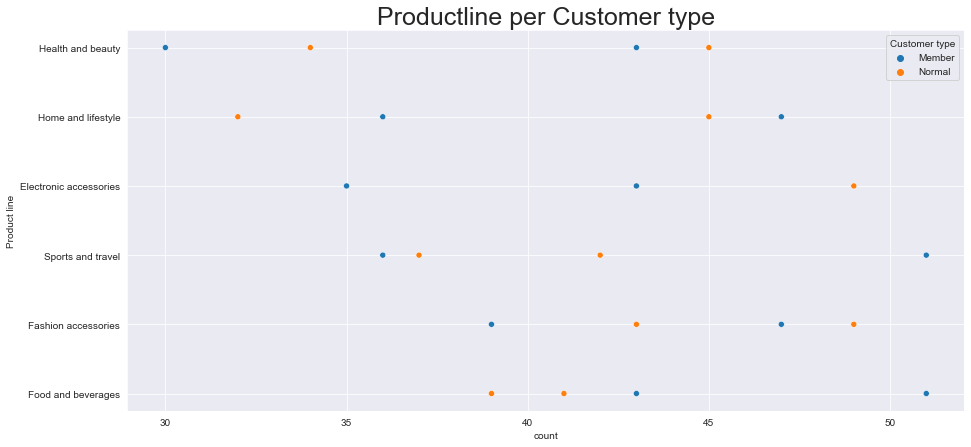

In [23]:
plt.figure(figsize=(15,7))
sns.scatterplot(y=line_Customer_Gender["Product line"],x=line_Customer_Gender["count"],hue=line_Customer_Gender["Customer type"])
plt.title("Productline per Customer type",fontsize=25)

Member customer type led in purchasing the following product lines;Home and lifestyle,Sports and travel,Food and beverages.
While Normal customer type led in purchase of the following product lines;Health and Beauty,Electronics, Fashion accesories

In [24]:
line_Gender = df.groupby(["Product line","Gender"])["Gender"].count().reset_index(name="count")
line_Gender = line_Gender.sort_values("count",ascending=False)
line_Gender





,Product line,Gender,count
2,Fashion accessories,Female,96
4,Food and beverages,Female,90
7,Health and beauty,Male,88
10,Sports and travel,Female,88
1,Electronic accessories,Male,86
0,Electronic accessories,Female,84
5,Food and beverages,Male,84
3,Fashion accessories,Male,82
9,Home and lifestyle,Male,81
8,Home and lifestyle,Female,79


Text(0.5, 1.0, 'Preffered product line per Gender')

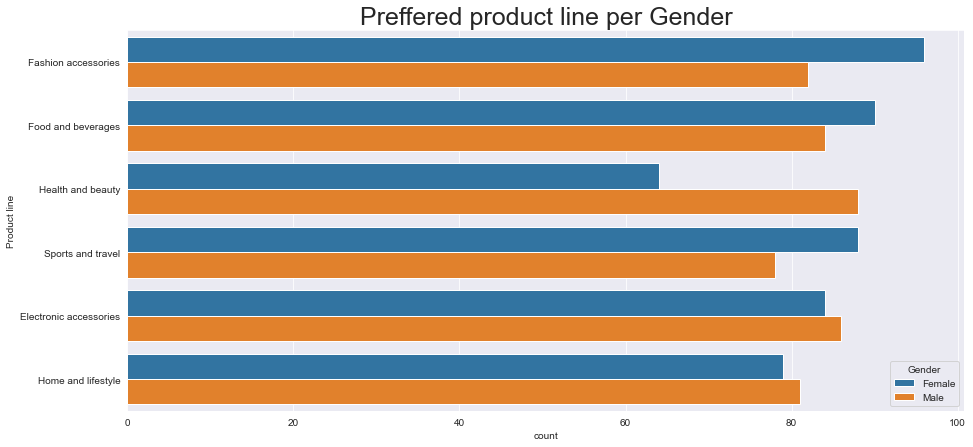

In [25]:

plt.figure(figsize=(15,7))
sns.barplot(y=line_Gender["Product line"],x=line_Gender["count"],hue=line_Gender["Gender"])
plt.title("Preffered product line per Gender",fontsize=25)


Female customers led in purchase of the following product lines;Fashion accessories,Food and beverages,Sports and travel.Male customers led in purchase of  the following product lines;Health,Electronics, Home and lifestyle

In [26]:
df["Total"].describe()

count    1000.000000
mean      322.966749
std       245.885335
min        10.678500
25%       124.422375
50%       253.848000
75%       471.350250
max      1042.650000
Name: Total, dtype: float64

Text(0.5, 1.0, 'Product line vs Totals')

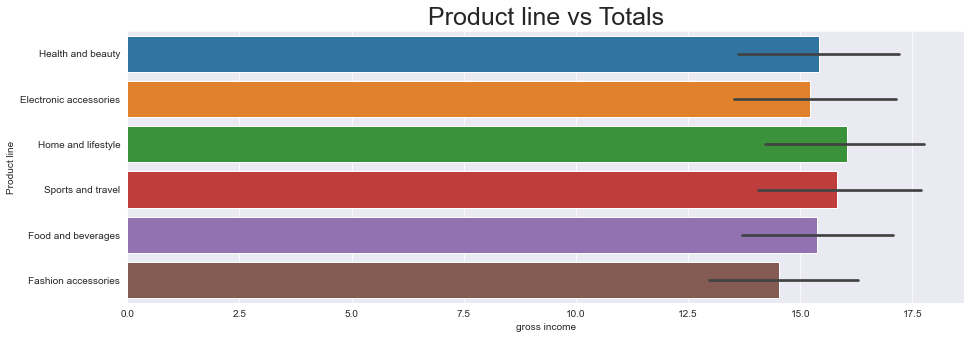

In [27]:
plt.figure(figsize=(15,5))
sns.barplot(x=df["gross income"],y=df["Product line"])
plt.title("Product line vs Totals",fontsize=25)

Overally,The highest Total sales were from the Home and lifestyle product line ,followed by Sport and travel product line  while the least was from Fashion accessories product line

Text(0.5, 1.0, 'Product line vs gross income')

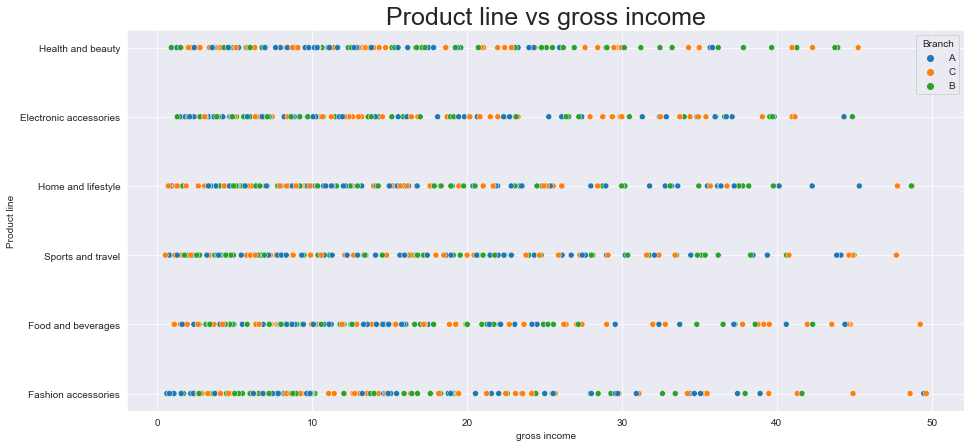

In [28]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=df["gross income"],y=df["Product line"],hue=df["Branch"])
plt.title("Product line vs gross income",fontsize=25)

Branch C had the most total sales from all product linne except Electronics and Home style which were carried by Branch B

# DATE

### detailed analysis on the Month

January had the leading sales followed by march and February

In [34]:
month=df["Month"].value_counts
plt.figure(figsize=(15,10))
explode = (0.05, 0.05, 0.05)





<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Profitable Branch per Month')

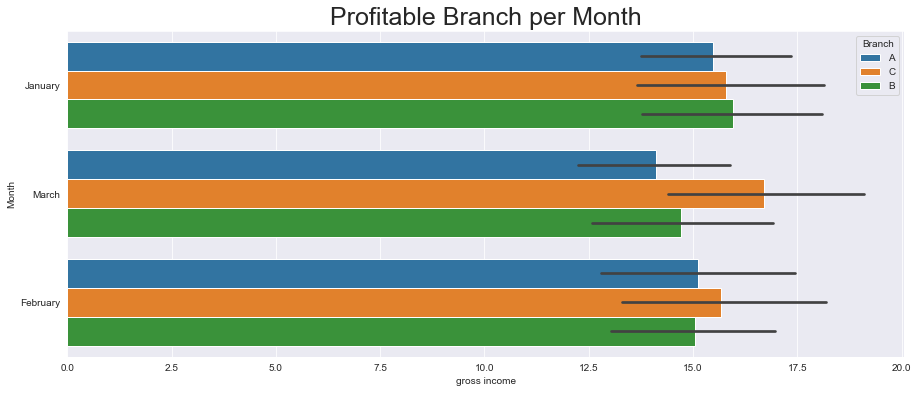

In [35]:
plt.figure(figsize=(15,6))
sns.barplot(y="Month",x="gross income",hue="Branch",data=df)
plt.title("Profitable Branch per Month",fontsize=25)

In january, Branch B made more sales,followed by C then A.In february,Branch made more sales compared to B then A. In March,Branch C had the most sales followed by B then A

Text(0.5, 1.0, 'Profitable Product line per month')

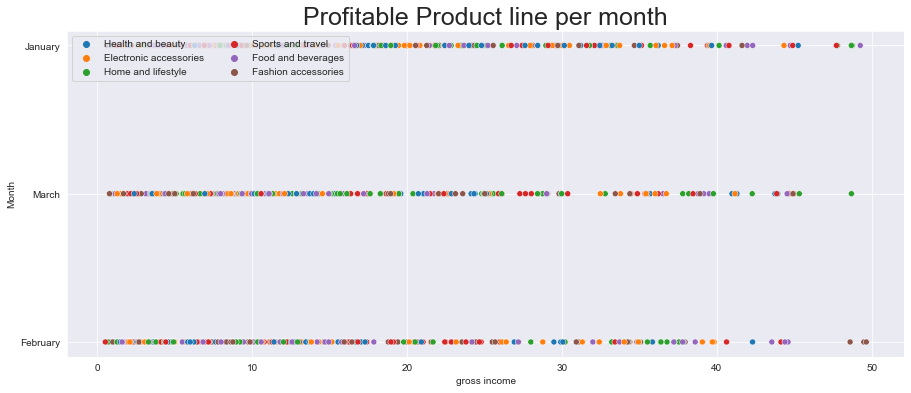

In [36]:
plt.figure(figsize=(15,6))
sns.scatterplot(y="Month",x="gross income",hue="Product line",data=df)
plt.legend(ncol=2, loc="upper left")
plt.title("Profitable Product line per month",fontsize=25)

Overally,the most sold product line was Food and Beverages, in February was Fashion and accessories  maybe due to the valetines day,while in march the most sold product line was Homeand lifestyle

### detailed analysis on the day

Text(0.5, 1.0, 'Income per Day')

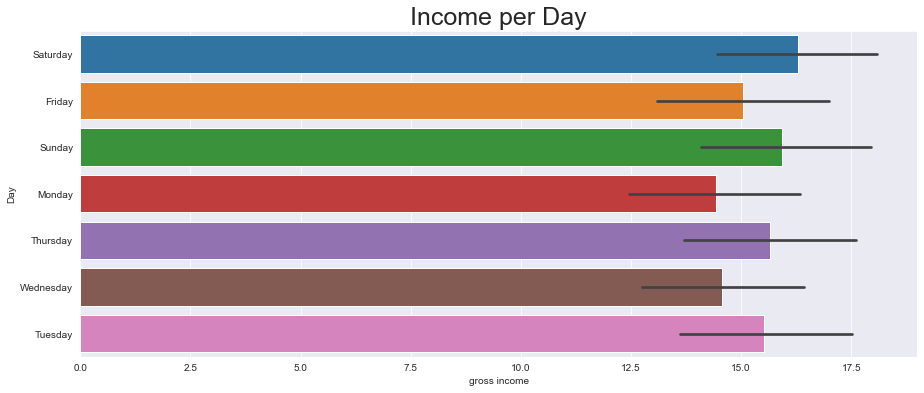

In [37]:
plt.figure(figsize=(15,6))
sns.barplot(x="gross income",y="Day",data=df)
plt.title("Income per Day",fontsize=25)

Overally,Saturday had the most sales ,followed by Sunday, then thursday  while monday had the least sales

Text(0.5, 1.0, 'Daily income per Branch')

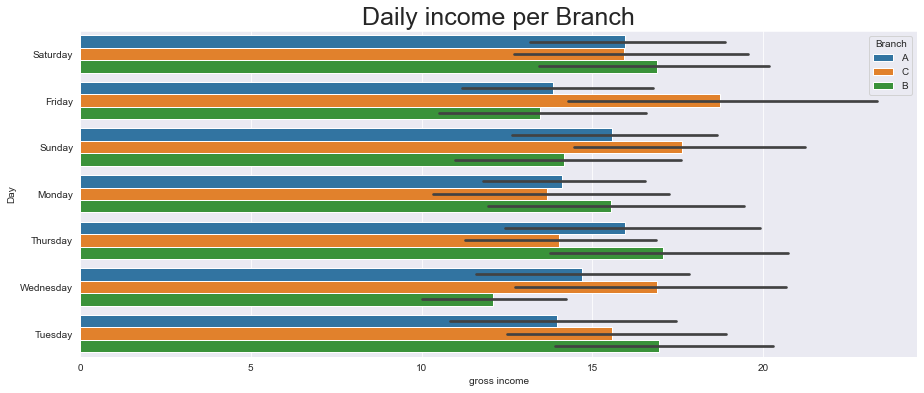

In [38]:
plt.figure(figsize=(15,6))
sns.barplot(x="gross income",y="Day",hue="Branch",data=df)
plt.title("Daily income per Branch",fontsize=25)


Branch A was  the least profitable on monday,tuesday and friday while it had most sales on Saturday. Branch B was the most profitable branch on Saturday,monday and tuesday while Branch C was the most profitable branch on Friday,sunday,and wednesday

Text(0.5, 1.0, 'Daily income per Product line')

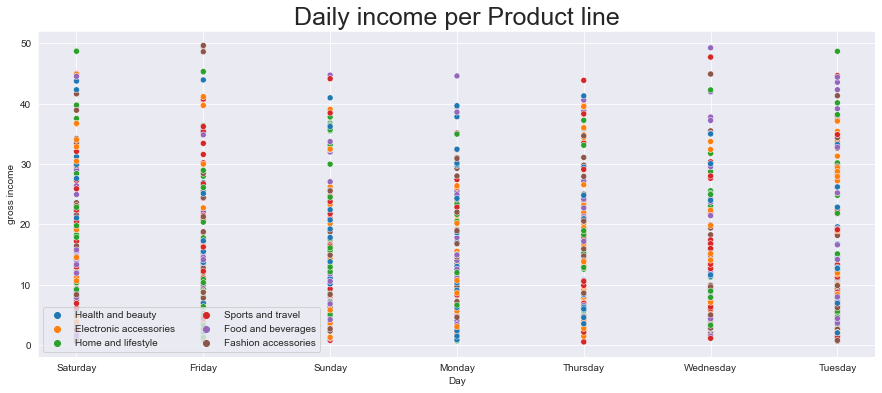

In [39]:
plt.figure(figsize=(15,6))
sns.scatterplot(x="Day",y="gross income",hue="Product line",data=df)
plt.legend(ncol=2, loc="lower left")
plt.title("Daily income per Product line",fontsize=25)

Home and lifestyle product line had the most income on Saturday and Tuesday.Food and beverages had the highest income on sunday,monday and wednesday.Fashion accesories  had the highest income on friday.On thursday,Sports and travel had the highest income

# Payment

In [40]:
pay  = df["Payment"].value_counts()
pay

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

array([<AxesSubplot:ylabel='Payment'>], dtype=object)

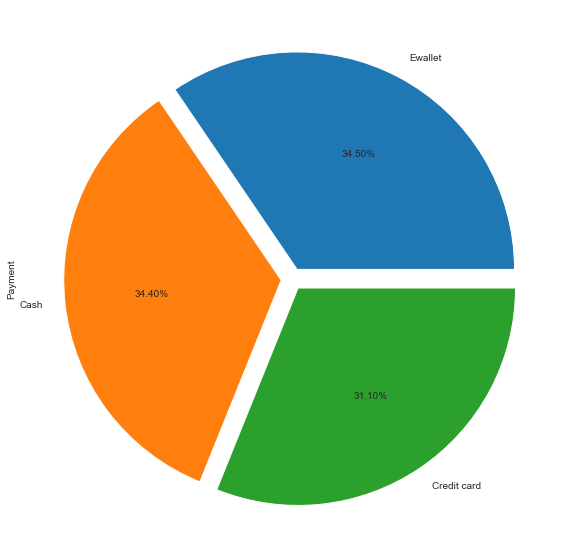

In [41]:
plt.figure(figsize=(15,10))
explode = (0.05, 0.05, 0.05)
pay.plot(kind='pie',autopct='%1.2f%%',subplots=True,figsize=(10,10),explode=explode)

Ewallet was the mostly used payment method followedby Cash then credit card

In [42]:
pay_branch = df.groupby(["Payment","Branch"])["Payment"].count().reset_index(name="count")
pay_branch

,Payment,Branch,count
0,Cash,A,110
1,Cash,B,110
2,Cash,C,124
3,Credit card,A,104
4,Credit card,B,109
5,Credit card,C,98
6,Ewallet,A,126
7,Ewallet,B,113
8,Ewallet,C,106


Text(0.5, 1.0, 'Payment method per Branch')

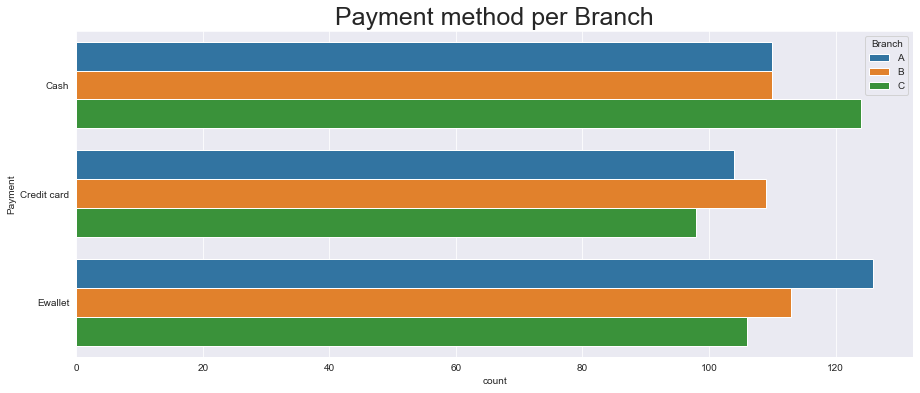

In [43]:
plt.figure(figsize=(15,6))
sns.barplot(x="count",y="Payment",hue="Branch",data=pay_branch)
plt.title("Payment method per Branch",fontsize=25)

Overally, in Branch A the mostly used Payment method was E wallet.In Branch B , the mostly used payment method was via Credit card while in Branch C ,the most payment method used was Cash

In [44]:
pay_customer = df.groupby(["Payment","Customer type"])["Payment"].count().reset_index(name="count")
pay_customer

,Payment,Customer type,count
0,Cash,Member,168
1,Cash,Normal,176
2,Credit card,Member,172
3,Credit card,Normal,139
4,Ewallet,Member,161
5,Ewallet,Normal,184


Text(0.5, 1.0, 'Payment method per Customer type')

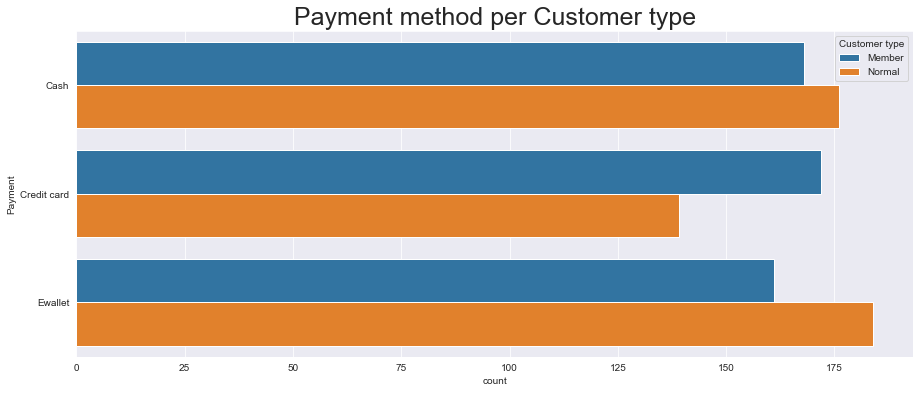

In [45]:
plt.figure(figsize=(15,6))
sns.barplot(y="Payment",x="count",hue="Customer type",data=pay_customer)
plt.title("Payment method per Customer type",fontsize=25)

Member customer type mostly used their credit cards,while Normal customers mostly used Ewallet followed by Cash

Text(0.5, 1.0, 'Payment method per Product line based on gross income')

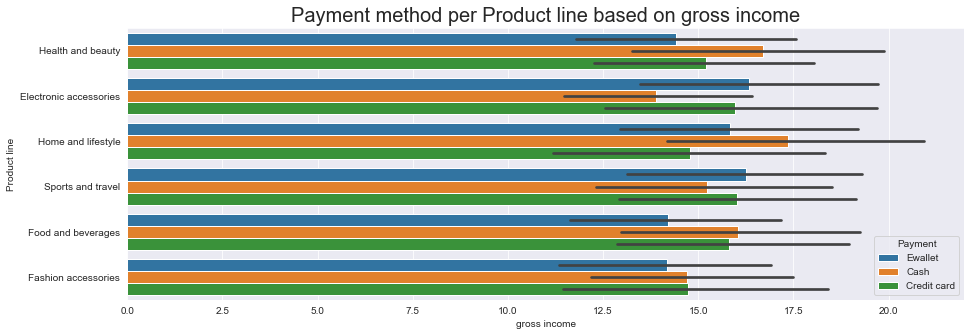

In [47]:
plt.figure(figsize=(15,5))
sns.barplot(y="Product line",x="gross income",hue="Payment",data=df)
plt.title("Payment method per Product line based on gross income",fontsize=20)

Ewallet was mostly used to purchase Sport and travel product line.Cash was mostly used to purchase  the following product lines;Health and beauty,Home and lifestyle,and food and beverages. Credit card was mostly used to purchase electronics, and Fashion accessories product lines

In [48]:
pay_date = df.groupby(["Payment","Month","Day"])["Day"].count().reset_index(name="count")
pay_date.head()

,Payment,Month,Day,count
0,Cash,February,Friday,18
1,Cash,February,Monday,15
2,Cash,February,Saturday,21
3,Cash,February,Sunday,18
4,Cash,February,Thursday,20


Text(0.5, 1.0, 'Payment method per Month')

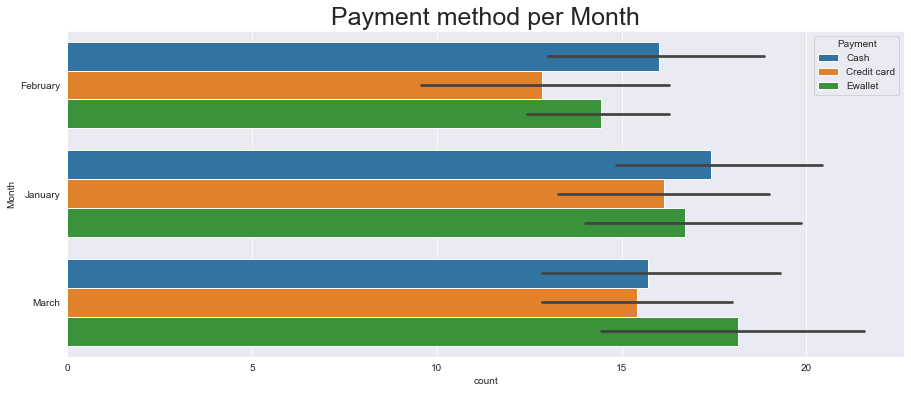

In [49]:
plt.figure(figsize=(15,6))
sns.barplot(x="count",y="Month",hue="Payment",data=pay_date)
plt.title("Payment method per Month",fontsize=25)

In january,Cash was the mostly used means of payment, on february,Cash was still the mostly used payment method while in March,Ewallet was the mostly used payment method

Text(0.5, 1.0, 'Payment method per Day')

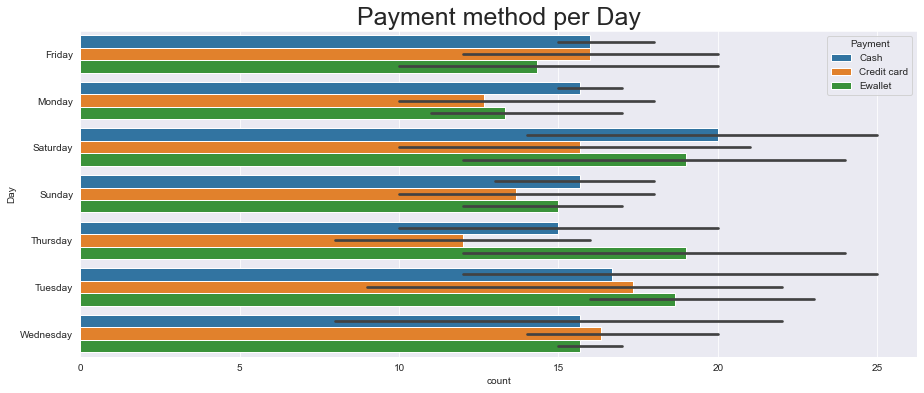

In [50]:
plt.figure(figsize=(15,6))
sns.barplot(x="count",y="Day",hue="Payment",data=pay_date)
plt.title("Payment method per Day",fontsize=25)

Cash was mostly used on saturday,sunday,tuesday and wednesday.Credit card was mostly used on Monday and friday.Ewallet was mostly used on Thursday